In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from KMeans import kmeans
from PCA import pca
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Preprocessing
1. Remove the id and diagnosis columns from data to perform unsupervised learning. The diagnosis column will be saved by itself for later comparisons.
2. PCA requires centering of data (by subtracting mean) and normalising features. Both are done by standard scaler.

In [2]:
# Load the dataset and drop irrelevant columns
data = pd.read_csv('data.csv')
data.drop(['id'], axis=1, inplace=True)
# Encode 'diagnosis' (malignant -> 0, benign -> 1) for later comparison
data['diagnosis'] = data['diagnosis'].map({'M': 0, 'B': 1})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
diag = data['diagnosis']
y_true = diag.to_numpy()
print(diag.value_counts())

diagnosis
1    357
0    212
Name: count, dtype: int64


In [4]:
features = data.drop(['diagnosis'], axis=1)
# Normalize the data (mean = 0, variance = 1)
std_dev = features.std()
features = (features - features.mean()) / std_dev.replace(0, 1)  # Avoid dividing by zero
features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


# Experiment 1 - No PCA
We will cluster the data using all 30 features. This high dimensionality will result in high values of inertia when using small number of clusters.  
Although the inertia is still high, the elbow is clearly at K = 2 since it is the point that most change in rate of change of inertia is observed.

In [5]:
# Function to find K means for a range of K, then plot the inertia against K to choose best K
def elbow_method(data, k_values, plot_title):
    # Range of k values to test
    inertias = []
    for k in k_values:
        cost, clusters = kmeans(data, k, init='k-means++', random_state = 42)
        inertias.append(cost)
    
    # Plot the elbow method graph
    plt.plot(k_values, inertias, marker='o')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia")
    plt.title(plot_title)
    plt.xticks(k_values) #set ticks to be only the k values
    plt.grid(True)
    plt.show()
    print(f'Starting inertia at K = 1: {inertias[0]}')
    print(f'Ending inertia at K = {k_values[-1]}: {inertias[-1]}')

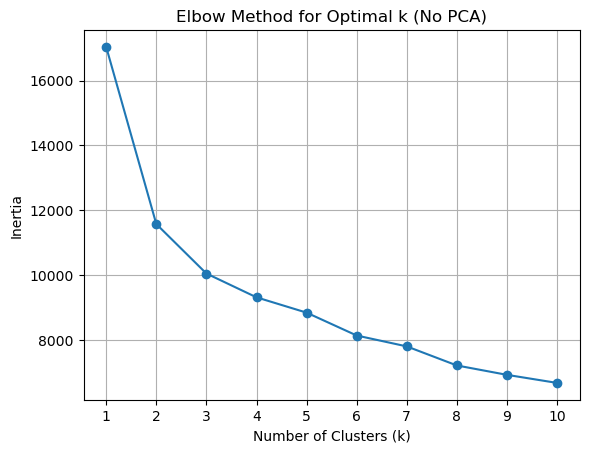

Starting inertia at K = 1: 17040.0
Ending inertia at K = 10: 6673.157481408121


In [6]:
# Convert features from pandas data frame to numpy array
features_np = features.to_numpy()
k_values = range(1, 11)  # Test k from 1 to 10
plot_title = "Elbow Method for Optimal k (No PCA)"
elbow_method(features_np, k_values, plot_title)

# Experiment 2: Using PCA
We will test using PCA to reduce dimensionality from 1D to 3D.  
We will notice from the following graphs that the elbow is still at K = 2, but the effect is much more pronounced as dimension decrease.  
The range of inertia is also smaller at lower dimensions. The ranges are (No PCA, 3D, 2D, 1D):  
1. Max inertia (at K =  1): [17040, 12377, 10776, 7543]
2. Min inertia (at K = 10): [6673, 2657, 1408, 136]
A smaller number of datapoints means that there will be a smaller number of distances to square to each cluster.
  
The elbow being at K = 2 for all of them makes sense due to the nature of the data set having actually only 2 labels (Benign or Malignant tumor)

Explained variance ratio: [0.44272026]
Total explained variance: 0.4427202560752638
Reduced data shape: (569, 1)


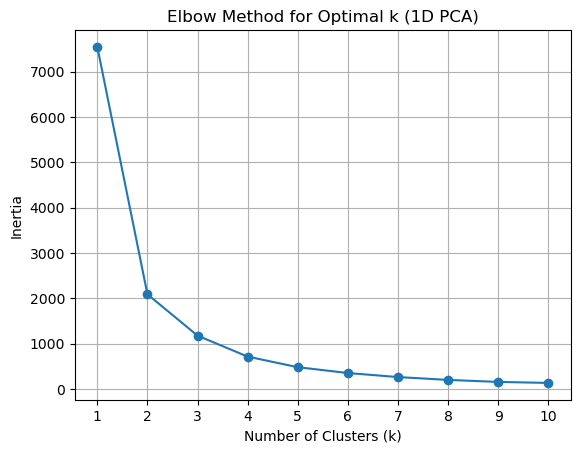

Starting inertia at K = 1: 7543.9531635224885
Ending inertia at K = 10: 136.80964997129502
Explained variance ratio: [0.44272026 0.18971182]
Total explained variance: 0.6324320765155946
Reduced data shape: (569, 2)


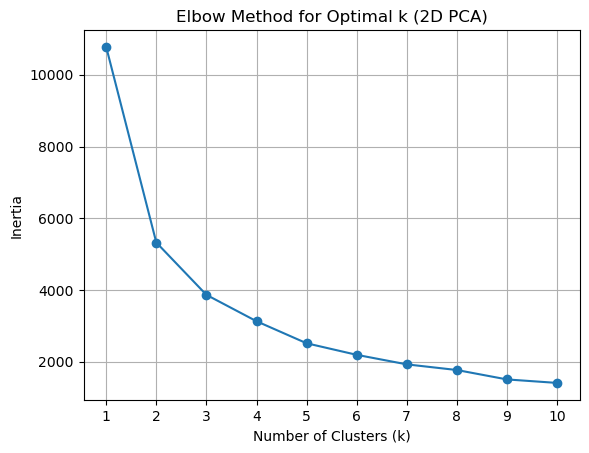

Starting inertia at K = 1: 10776.642583825727
Ending inertia at K = 10: 1408.2602853309418
Explained variance ratio: [0.44272026 0.18971182 0.09393163]
Total explained variance: 0.7263637090899083
Reduced data shape: (569, 3)


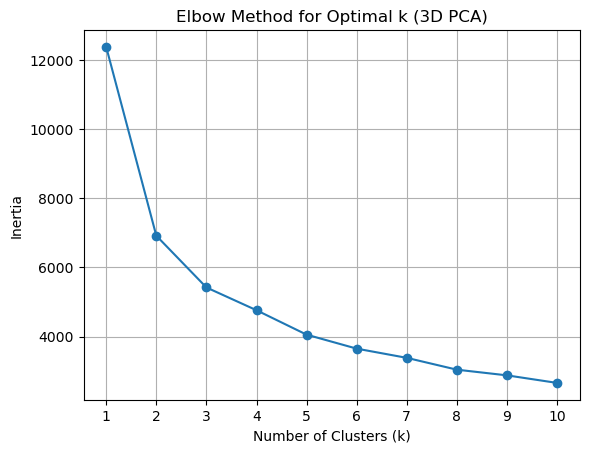

Starting inertia at K = 1: 12377.237602892035
Ending inertia at K = 10: 2657.892628048606


In [8]:
reduced_features_list = []
explained_variance_list = []
for n in range(1,4):
    reduced_data, explained_variance_ratio = pca(features, n_components=n)
    print(f"Explained variance ratio: {explained_variance_ratio}")
    print(f"Total explained variance: {sum(explained_variance_ratio)}")
    print(f"Reduced data shape: {reduced_data.shape}")
    reduced_features_list.append(reduced_data)
    explained_variance_list.append(explained_variance_ratio)
    k_values = range(1, 11)  # Test k from 1 to 10
    plot_title = f"Elbow Method for Optimal k ({n}D PCA)"
    elbow_method(reduced_data, k_values, plot_title)

# Comparing 2 Cluster PCA and True Labels
Now that we found out K = 2 is best, we will visualize the differences between the unsupervised labels and the true labels of the data

In [9]:
# K equal 2 is best:
cost_list = []
clusters_list = []
for data in reduced_features_list:
    cost, clusters = kmeans(data, k=2, init='k-means++', random_state = 42)
    cost_list.append(cost)
    clusters_list.append(clusters)

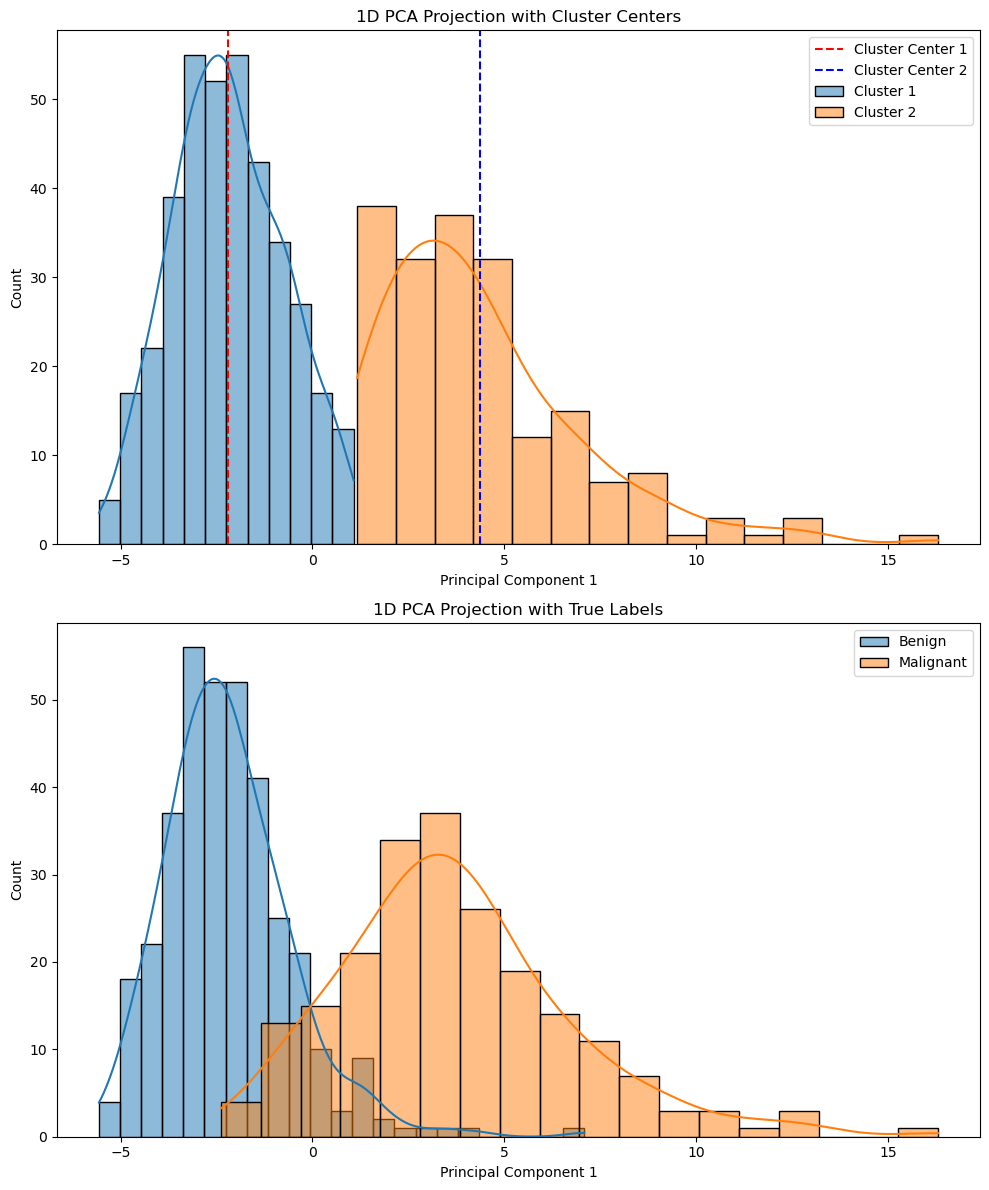

In [10]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12))  # 2 rows, 1 column of subplots
#  Plot the clusters colored by k-means labels
# Create a DataFrame for easier plotting with Seaborn
clusters = clusters_list[0]
samples1 = np.array(clusters[0]['samples'])
samples2 = np.array(clusters[1]['samples'])
total_samples = np.concatenate((samples1, samples2))
# First cluster is marked as zero
cluster_label1 = np.zeros(samples1.shape[0])
# Second cluster is marked as one
cluster_label2 = np.ones(samples2.shape[0])
total_cluster_labels = np.concatenate((cluster_label1, cluster_label2))
df_pca = pd.DataFrame(total_samples, columns=['PC1'])
target_names = {0: 'Cluster 1', 1: 'Cluster 2'}
df_pca['Cluster'] = [target_names[label] for label in total_cluster_labels]
i = 0
for label in np.unique(df_pca['Cluster']):
    center = clusters[i]['center']
    subset = df_pca[df_pca['Cluster'] == label]
    sns.histplot(subset['PC1'], label=label, kde=True, alpha=0.5, ax=axes[0])  # Use axes[0]
    axes[0].axvline(center, color='red' if i==0 else 'blue', linestyle='--', label=f"Cluster Center {i + 1}")
    i += 1

axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Count")
axes[0].set_title("1D PCA Projection with Cluster Centers")
axes[0].legend()

# Create a DataFrame for easier plotting with Seaborn
target_names = {0: 'Malignant', 1: 'Benign'}
df_pca = pd.DataFrame(reduced_features_list[0], columns=['PC1'])
# df_pca['True Label'] = y_true
df_pca['True Label'] = [target_names[label] for label in y_true]
# Second subplot: Histograms colored by true labels
for label in np.unique(df_pca['True Label']):
    subset = df_pca[df_pca['True Label'] == label]
    sns.histplot(subset['PC1'], label=label, kde=True, alpha=0.5, ax=axes[1])  # Use axes[0]
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Count")
axes[1].set_title("1D PCA Projection with True Labels")
axes[1].legend()

plt.tight_layout()
plt.show()

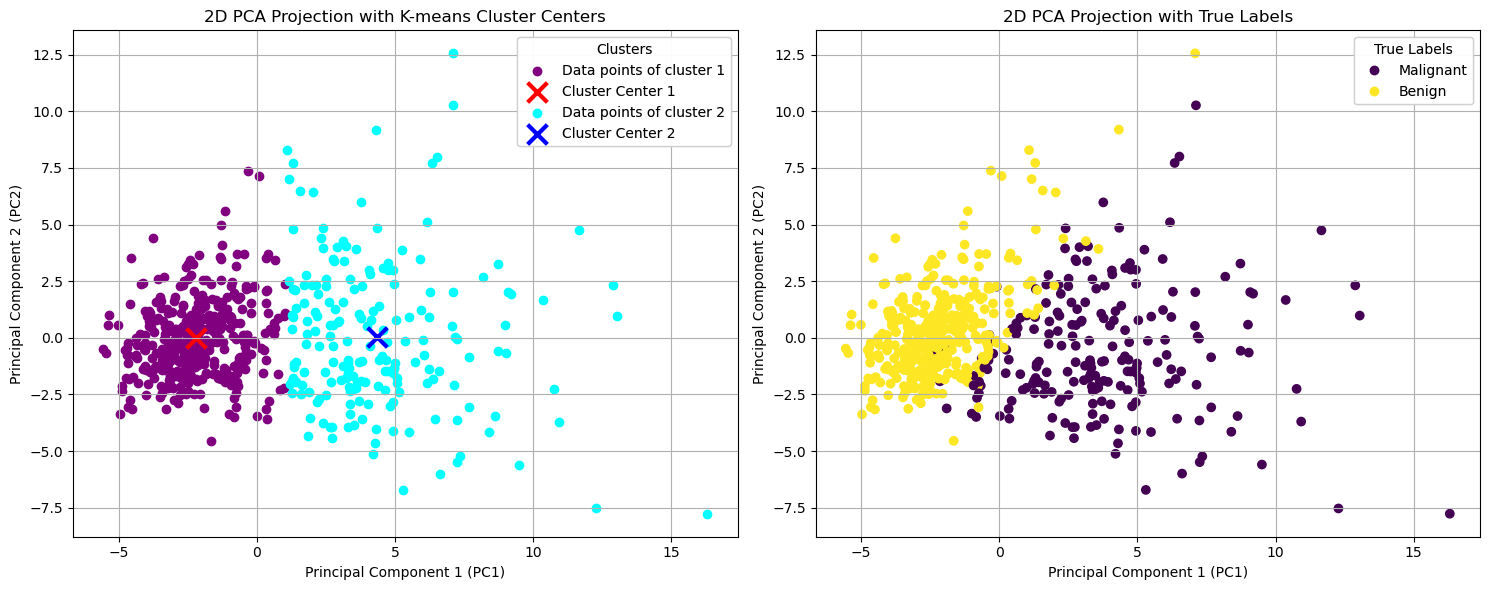

In [11]:
# Example using matplotlib
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)  # Create a subplot for k-means
clusters = clusters_list[1]
# Plot the clusters colored by k-means labels
for i in range(len(clusters)):
    center = clusters[i]['center']
    samples = np.array(clusters[i]['samples'])
    # print(reduced_features_list[1])
    # print(samples)
    scatter = plt.scatter(samples[:, 0], samples[:, 1], c='purple' if i == 0 else 'cyan', label = f"Data points of cluster {i + 1}")
    plt.scatter(center[0], center[1], marker='x', s=200, linewidths=3, color='red' if i == 0 else 'blue', label=f'Cluster Center {i + 1}')

plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("2D PCA Projection with K-means Cluster Centers")
legend1 = plt.legend(loc="upper right", title="Clusters")
plt.gca().add_artist(legend1)
plt.grid(True)


# Plot the clusters colored by true labels
y_true = diag.to_numpy()
plt.subplot(1, 2, 2)  # Create a subplot for true labels
scatter_true = plt.scatter(reduced_features_list[1][:, 0], reduced_features_list[1][:, 1], c=y_true, cmap='viridis')

plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("2D PCA Projection with True Labels")
handles, _ = scatter_true.legend_elements()
legend1 = plt.legend(handles, ['Malignant', 'Benign'], loc="upper right", title="True Labels")
plt.gca().add_artist(legend1)
plt.grid(True)

plt.tight_layout()
plt.show()

C:\Users\pc\anaconda3\envs\pytorch\Lib\site-packages\matplotlib\collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


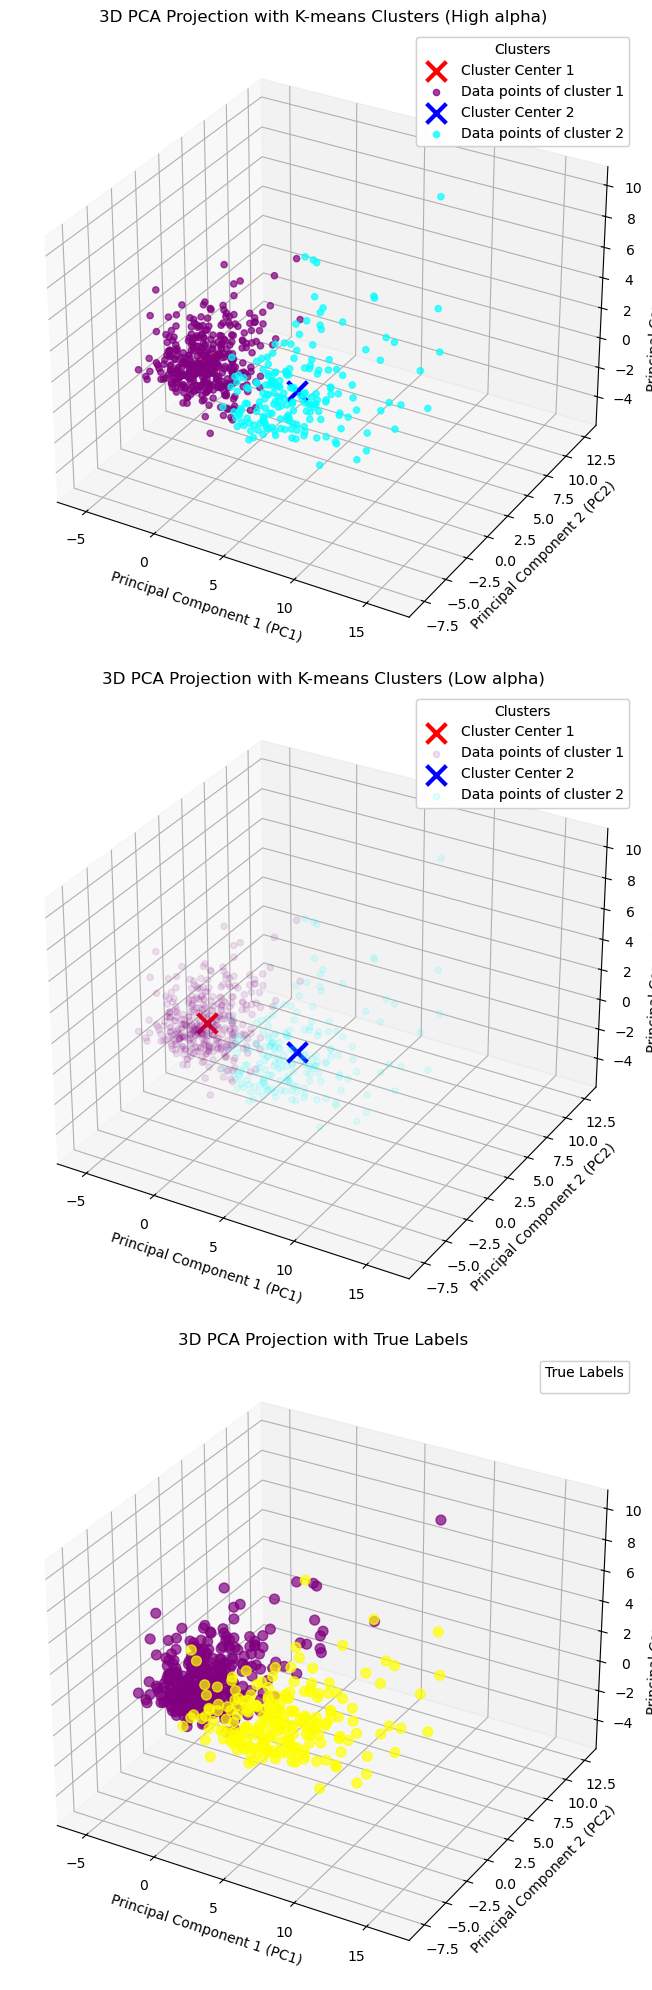

In [12]:
# Example using matplotlib
fig = plt.figure(figsize=(15, 20))
clusters = clusters_list[2]
ax1 = fig.add_subplot(3, 1, 1, projection='3d')  # Create a subplot for k-means
# Plot the clusters colored by k-means labels
for i in range(len(clusters)):
    center = clusters[i]['center']
    samples = np.array(clusters[i]['samples'])
    ax1.scatter(center[0], center[1], center[2], marker='x', s=200, linewidths=3, color='red' if i == 0 else 'blue', label=f'Cluster Center {i + 1}')
    scatter = ax1.scatter(samples[:, 0], samples[:, 1], samples[:, 2], c='purple' if i == 0 else 'cyan', alpha = 0.7, label = f"Data points of cluster {i + 1}")
    

ax1.set_xlabel("Principal Component 1 (PC1)")
ax1.set_ylabel("Principal Component 2 (PC2)")
ax1.set_zlabel("Principal Component 3 (PC3)") #remove this for 2D plot
ax1.set_title("3D PCA Projection with K-means Clusters (High alpha)")
legend1 = ax1.legend(loc="upper right", title="Clusters")
ax1.add_artist(legend1)

ax3 = fig.add_subplot(3, 1, 2, projection='3d')  # Create a subplot for k-means
# Plot the clusters colored by k-means labels
for i in range(len(clusters)):
    center = clusters[i]['center']
    samples = np.array(clusters[i]['samples'])
    ax3.scatter(center[0], center[1], center[2], marker='x', s=200, linewidths=3, color='red' if i == 0 else 'blue', label=f'Cluster Center {i + 1}')
    scatter = ax3.scatter(samples[:, 0], samples[:, 1], samples[:, 2], c='purple' if i == 0 else 'cyan', alpha = 0.1, label = f"Data points of cluster {i + 1}")
    
ax3.set_xlabel("Principal Component 1 (PC1)")
ax3.set_ylabel("Principal Component 2 (PC2)")
ax3.set_zlabel("Principal Component 3 (PC3)") #remove this for 2D plot
ax3.set_title("3D PCA Projection with K-means Clusters (Low alpha)")
legend1 = ax3.legend(loc="upper right", title="Clusters")
ax3.add_artist(legend1)


# Plot the clusters colored by true labels
y_true = diag.to_numpy()
ax2 = fig.add_subplot(3, 1, 3, projection='3d')  # Create a subplot for true labels
unique_labels = [0,1]
for label in unique_labels:
    mask = y_true == label  # Create a boolean mask for points with this label
    scatter_true = ax2.scatter(reduced_features_list[2][mask, 0], reduced_features_list[2][mask, 1], reduced_features_list[2][mask, 2], s=50, c='yellow' if label == 0 else 'purple', alpha = 0.7) #s is the size of the points

ax2.set_xlabel("Principal Component 1 (PC1)")
ax2.set_ylabel("Principal Component 2 (PC2)")
ax2.set_zlabel("Principal Component 3 (PC3)")
ax2.set_title("3D PCA Projection with True Labels")
handles, _ = scatter_true.legend_elements()
legend1 = ax2.legend(handles, ['Malignant', 'Benign'], loc="upper right", title="True Labels")
ax2.add_artist(legend1)

plt.tight_layout()
plt.show()